# Module 1, Practical 10
## Part 1
Several years ago, researchers compiled a dataset known as the ["Copenhagen Network study"](https://figshare.com/articles/dataset/The_Copenhagen_Networks_Study_interaction_data/7267433). This dataset includes a range of information collected from 700 university students. In this exam, we will focus on the following files:

1. A list of phone calls:  [calls.csv](DTU/calls.csv)
3. Information about Facebook friendships:  [fb_friends.csv](DTU/fb_friends.csv)
4. Student gender data:  [genders.txt](DTU/genders.txt)

The data in these files are structured as follows:


**calls.csv**
```
timestamp,caller,callee,duration
184,300,301,121
3920,512,299,670
```
**fb_friends.csv**
```
# user_a,user_b
0,512
0,263
0,525
```
**gender.txt**
```
0_M 2_M 3_M 4_M 5_M ...
```

Write a program that performs the following tasks:

1. **Find the Longest Call:** Identify the call with the longest duration from the dataset.
2. **Check Facebook Friendship:** Determine if the caller and receiver in the longest call are friends on Facebook.
3. **Display Genders:** Print the gender of both students involved in the longest call.
4. **Discretize Interaction Durations:** Convert the duration of each interaction from seconds into hourly units. Any interaction that occurs within one hour should be rounded up to 1 (for example, 45 minutes or 3600 seconds both discretize to 1 hour).

**Input:** The program should take in the file CALLS.

```
    time  id_a id_b duration
[
    [  184,   300,   301,   121],
    [ 3920,   512,   299,   670],
    [ 5623,   301,   300,   504],
    [ 9252,   401,   457,    -1],
    [15466,   512,     0,     5],
    [15497,   512,     0,    28],
    [26400,    19,    47,   619],
    [31312,   687,   310,    11],
    [36265,   300,   301,    74],
    [37049,   634,   681,    20],
   ...,                                              
]
```
output CALLS
```
    time  id_a id_b duration
[
    [  0,   300,   301,   121],
    [  1,   512,   299,   670],
    [  1,   301,   300,   504],
    [  2,   401,   457,    -1],
    [  4,   512,     0,     5],
    [  4,   512,     0,    28],
    [  7,    19,    47,   619],
    [  8,   687,   310,    11],
    [ 10,   300,   301,    74],
    [ 10,   634,   681,    20],
   ...,                                              
]
```

5. then plot those interactions, you should obtain a plot like the one bellow! pay attention to x and y labels  

![nb_interactions](DTU/nb_interactions.png)



6.  Persistent Score: Researchers define a Persistent Score to measure how repetitive the interactions between two students are. A pair of studens (a,b) is said to be persistent if they repeatedly call themself multiple times within short time intervals. 

*Definition of Persistent Score* For every pair of students (A, B), we sort all their calls chronologically and count how many consecutive calls occur within 2 hours of each other (i.e. $\Delta$ time $\leq$ 7200 seconds). The Persistent Score of a student S is the total number of such “persistent interactions” they participate in.

Let  $C = \{(a_i, b_i, t_i)\}_{i=1}^N$
be the set of call records, where each tuple $(a_i, b_i, t_i)$ represents a call from student $a_i$ to student $b_i$ at timestamp $t_i$ (in seconds).

 - For each unordered pair of students $(A, B)$ (with $A \neq B$), consider the ordered set of timestamps of all calls between them:$T_{AB} = \{ t_1, t_2, \dots, t_k \}, \quad \text{with } t_1 < t_2 < \dots < t_k$
 - Define the number of *persistent interactions* between $A$ and $B$ as:
    $$ P_{AB} = \sum_{i=1}^{k-1} \mathbb{1}\{ |t_{i+1} - t_i| \le 7200 \}$$
    where $\mathbb{1}\{\cdot\}$ is the indicator function, equal to 1 if the condition holds and 0 otherwise.
    
 -The *Persistent Score* of a student $S$ is then: $ PS(S) = \sum_{B \neq S} P_{SB}$

That is, the total number of persistent interactions in which student $S$ participates.

In other words, we look at all the calls exchanged between every pair of students.
For each pair $(A, B)$, we sort their calls by time and check how many times they call each other again within two hours of a previous call (i.e. within 7,200 seconds). Each such occurrence counts as a persistent interaction for that pair. Then, for each student $S$, we compute their Persistent Score by summing up all the persistent interactions they are involved in — that is, all the times $S$ called or was called again within two hours by any other student.

Intuitively, a higher Persistent Score means that the student tends to interact repeatedly with the same people in short time intervals, showing a more persistent communication pattern.



Write a function that:
 - Computes the persistent score for all students.
 - Returns the top 3 students with the highest persistent scores.
 - Prints for each of them:
    1. Their ID
    2. The total number of persistent interactions
    3. Their gender


**NOTE** you should define a function for each point.


<div class="tggle" onclick="toggleVisibility('ex1');">Show/Hide Solution</div>
<div id="ex1" style="display:none;">

1) the longest call is: 136 and 137


/tmp/ipykernel_21899/2584415146.py:14: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  user_a = i[0]
/tmp/ipykernel_21899/2584415146.py:15: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  user_b = i[1]


2) 137  and  136  are friend of FB
3)
gender of  137  =  F
gender of  136  =  M


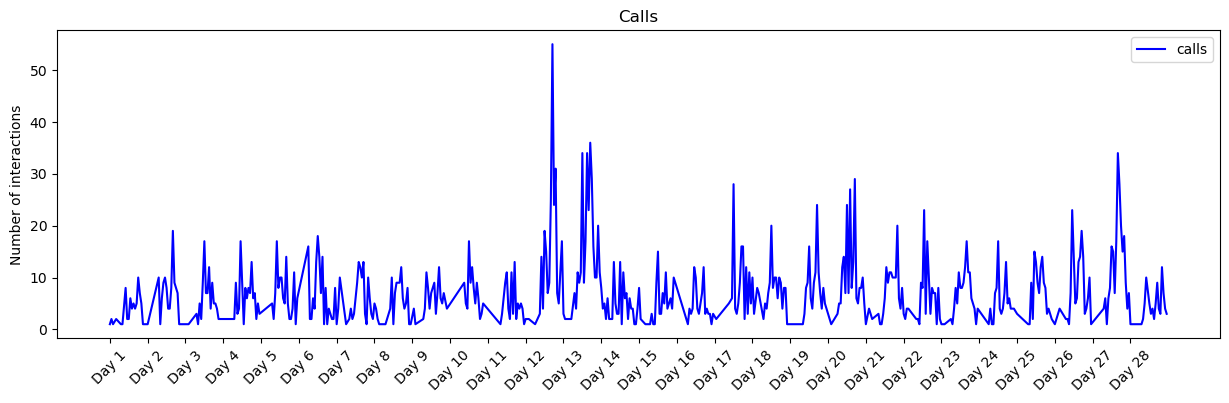

6) Persistent Score analysis

Top 3 Persistent Callers:
--------------------------
Student 578:
   Persistent Score: 93
   Gender: M

Student 289:
   Persistent Score: 74
   Gender: M

Student 20:
   Persistent Score: 62
   Gender: M



In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import argparse


def get_longest_call(calls):
    longest_call = calls.loc[calls['duration'].idxmax()]
    id_caller, id_callee = longest_call.caller, longest_call.callee
    return id_caller, id_callee


def get_friends_fb(fb):
    fb_friends = []
    for _, i in fb.iterrows():
        user_a = i[0]
        user_b = i[1]
        fb_friends.append((user_a, user_b))
    return fb_friends


def get_gender(gender, id_caller, id_callee):
    print("Gender of", id_callee, "=", gender.get(id_callee, "?"))
    print("Gender of", id_caller, "=", gender.get(id_caller, "?"))


def get_sms_count_dict(sms):
    sms_count = dict()
    for _, i in sms.iterrows():
        _, sender, receiver = i
        if sender > receiver:
            sender, receiver = receiver, sender
        sms_count[(sender, receiver)] = sms_count.get((sender, receiver), 0) + 1
    return sms_count


def get_tot_messages(sms_count, fb_friends):
    tot_messages = 0
    for k, v in sms_count.items():
        id_a, id_b = k
        if (id_a, id_b) not in fb_friends and (id_b, id_a) not in fb_friends:
            tot_messages += v
    return tot_messages


def load_gender(path):
    with open(path, "r") as f:
        data = f.read()
    res = {}
    for el in data.split(" "):
        tmp = el.split("_")
        if len(tmp) == 2:
            idx, gender = tmp
            res[int(idx)] = gender.strip()
    return res


def get_discretized_times(calls_small):
    times_call = []
    for t, a, b, d in calls_small.to_numpy():
        times_call.append(int(t / (60 * 60)))
    return times_call


def my_plot(times_call, plot_name="nb_interactions.png"):
    t_c, count_c = np.unique(times_call, return_counts=True)
    x_ticks = []
    x_labels = []
    for i in range(int((max(t_c) / 24) + 1)):
        x_ticks.append(i * 24)
        x_labels.append("Day " + str(i + 1))
    plt.figure(figsize=(15, 4))
    plt.plot(t_c, count_c, label="calls", color="blue")
    plt.ylabel("Number of interactions")
    plt.xticks(x_ticks, x_labels, rotation=45)
    plt.title("Calls Over Time")
    plt.legend()
    plt.tight_layout()
    plt.savefig(plot_name)
    print(f"Plot saved as '{plot_name}'")
    plt.show()


def Top3_Persistent_Callers(calls, gender_dict):
    calls = calls.sort_values(by="timestamp")
    pair_timestamps = {}
    for _, row in calls.iterrows():
        a, b, t = row["caller"], row["callee"], row["timestamp"]
        pair = tuple(sorted((a, b)))
        pair_timestamps.setdefault(pair, []).append(t)

    persistent_per_pair = {}
    for pair, times in pair_timestamps.items():
        times.sort()
        count = sum(abs(times[i + 1] - times[i]) <= 7200 for i in range(len(times) - 1))
        persistent_per_pair[pair] = count

    persistent_score = {}
    for (a, b), score in persistent_per_pair.items():
        persistent_score[a] = persistent_score.get(a, 0) + score
        persistent_score[b] = persistent_score.get(b, 0) + score

    top3 = sorted(persistent_score.items(), key=lambda x: x[1], reverse=True)[:3]
    print("\nTop 3 Persistent Callers:")
    print("--------------------------")
    for sid, score in top3:
        print(f"Student {sid}:")
        print(f"   Persistent Score: {score}")
        print(f"   Gender: {gender_dict.get(sid, '?')}\n")
    return top3


# ======================
# ARGPARSE ENTRY POINT
# ======================
def main():
    parser = argparse.ArgumentParser(description="Analyze DTU communication dataset.")

    parser.add_argument(
        "--calls", default="DTU/calls.csv", help="Path to calls.csv file (default: DTU/calls.csv)"
    )
    parser.add_argument(
        "--fb", default="DTU/fb_friends.csv", help="Path to fb_friends.csv file (default: DTU/fb_friends.csv)"
    )
    parser.add_argument(
        "--genders", default="DTU/genders.txt", help="Path to genders.txt file (default: DTU/genders.txt)"
    )
    parser.add_argument(
        "--plot_name",
        default="nb_interactions.png",
        help="Filename for saving the call plot (default: nb_interactions.png)",
    )

    args = parser.parse_args()

    # Load data
    fb = pd.read_csv(args.fb)
    calls = pd.read_csv(args.calls)
    gender = load_gender(args.genders)

    # 1) Longest call
    id_caller, id_callee = get_longest_call(calls)
    print("1) The longest call is between:", id_caller, "and", id_callee)

    # 2) Check if they are FB friends
    fb_friends = get_friends_fb(fb)
    if (id_callee, id_caller) in fb_friends or (id_caller, id_callee) in fb_friends:
        print("2)", id_callee, "and", id_caller, "are friends on FB")

    # 3) Gender
    print("3)")
    get_gender(gender, id_caller, id_callee)

    # 4) Plot calls over time
    print("4) Plotting call activity over time...")
    times_call = get_discretized_times(calls)
    my_plot(times_call, plot_name=args.plot_name)

    # 5) Persistent Score
    print("5) Persistent Score analysis")
    Top3_Persistent_Callers(calls, gender)


if __name__ == "__main__":
    main()


</div>